# CoralProtect 
An ML model to classify coral reefs as alive or dead

### Importing Libraries and Tools

In [69]:
#Adding Libraries

import os
from PIL import Image

import numpy as np
import pandas as pd

import tensorflow as tf
import keras

from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt

from keras.models import Sequential
from keras.layers import InputLayer, MaxPool2D, Conv2D, Dropout, Flatten, Dense, 

### Preparing Dataset for Training

In [34]:
# Reading data by looping every image

classes = [0, 1]

data = []
target = []

for single_class in classes:
    
    images = os.listdir('data/' + str(single_class))
    
    for single_image in images:
        
        file = np.array(Image.open('data/' + str(single_class) + '/' +single_image))
        
        data.append(file)
        target.append(single_class)


In [50]:
len(data), len(target)

(49, 49)

In [51]:
data = [data_item.flatten() for data_item in data]

In [52]:
X_train, X_test, Y_train, Y_test = train_test_split(data, target)

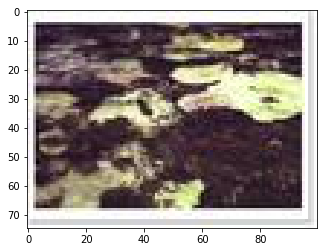

In [63]:
first_image = data[42]
first_image = np.array(first_image, dtype='float')
first_image = first_image.reshape((75,100,-1))
plt.imshow(first_image.astype(np.uint8))
plt.show()

In [56]:
# weights & biases
n_input = 22500
n_hidden_1 = 16
n_hidden_2 = 16
n_classes = 2

weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}

biases = {
    'h1': tf.Variable(tf.random_normal([n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}


In [57]:
tf.trainable_variables()

[<tf.Variable 'Variable:0' shape=(22500, 16) dtype=float32_ref>,
 <tf.Variable 'Variable_1:0' shape=(16, 16) dtype=float32_ref>,
 <tf.Variable 'Variable_2:0' shape=(16, 2) dtype=float32_ref>,
 <tf.Variable 'Variable_3:0' shape=(16,) dtype=float32_ref>,
 <tf.Variable 'Variable_4:0' shape=(16,) dtype=float32_ref>,
 <tf.Variable 'Variable_5:0' shape=(2,) dtype=float32_ref>]

In [58]:
def forward_propagation(x, weights, biases):
    in_layer1 = tf.add(tf.matmul(x, weights['h1']), biases['h1'])
    out_layer1 = tf.nn.relu(in_layer1)
    
    in_layer2 = tf.add(tf.matmul(out_layer1, weights['h2']), biases['h2'])
    out_layer2 = tf.nn.relu(in_layer2)
    
    output = tf.add(tf.matmul(out_layer2, weights['out']), biases['out'])
    return output

In [59]:
x = tf.placeholder("float", [None, n_input])
y =tf.placeholder(tf.int32, [None, n_classes])
pred = forward_propagation(x, weights, biases)

In [60]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels = y))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [61]:
optimizer = tf.train.AdamOptimizer(learning_rate=0.01)
optimize = optimizer.minimize(cost)

In [67]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [66]:
epochs = 4000
batch_size = 100
for epoch_no in range(epochs):
    for index, offset in enumerate(range(0, 86594, batch_size)):
        xs, ys = X_train[offset: offset + batch_size], Y_train[offset: offset + batch_size]
        sess.run(optimize, feed_dict={x: xs, t: ys})

        if index % 100 == 0:
            loss_val, acc_val = sess.run([loss, accuracy], feed_dict = {x: test_x, t: test_t})
            print ('Epoch %d, Step: %d, Loss: %f, Accuracy: %f'% (epoch_no, index, loss_val, acc_val))

NameError: name 't' is not defined

In [68]:
predictions = tf.argmax(pred, 1)
correct_labels = tf.argmax(y, 1)
correct_predictions = tf.equal(predictions, correct_labels)
predictions,correct_predictions  = sess.run([predictions, correct_predictions], feed_dict={x:mnist.test.images,
                                              y:mnist.test.labels})
correct_predictions.sum()

NameError: name 'mnist' is not defined

In [70]:
model = Sequential()

In [ ]:
model.add(InputL)